![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [2]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


## Filtre los datos para eliminar programas de TV y almacenarlos como ```netflix_subset```.

In [6]:
#Realizo una consulta para que me devuelva una bool Serie de Pandas donde me dice True cuando es "Movie" y "False en caso contrario"
netflix_subset_bool = netflix_df["type"] == "Movie"

#Con la Serie anterior filtro el DF para ontener el subset que necesito
netflix_subset = netflix_df[netflix_subset_bool == True]

netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


## Investigue y subconjunto de datos de películas de Netflix, manteniendo solo las columnas ```"title"```, ```"country"```, ```"genre"```, ```"release_year"```, ```"duration"``` y guardándolas en un nuevo DataFrame llamado ```netflix_movies```.

In [8]:
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


## Filtre ```netflix_movies``` para encontrar las películas que duren estrictamente menos de 60 minutos y guarde el ```DataFrame``` resultante como ```short_movies```; Inspeccione el resultado para encontrar posibles factores contribuyentes.

In [9]:
short_movies = netflix_movies[(netflix_movies["duration"] < 60) == True] 
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


## Usando un bucle ```for``` y sentencias ```if/elif```, recorra las filas ```netflix_movies``` y asigne colores de su elección a cuatro grupos de géneros ("Niños", "Documentales", "Stand-Up" y "Otros" para todo lo demás). Guarde los resultados en una ```colors``` lista. Inicialice un objeto de figura ```matplotlib``` llamado ```fig``` y cree un diagrama de dispersión para la duración de la película por año de lanzamiento usando la ```colors``` lista para colorear los puntos y usando las etiquetas ```"Release year"``` para el eje x, ```"Duration (min)"``` el eje y y el título ```"Movie Duration by Year of Release"```.

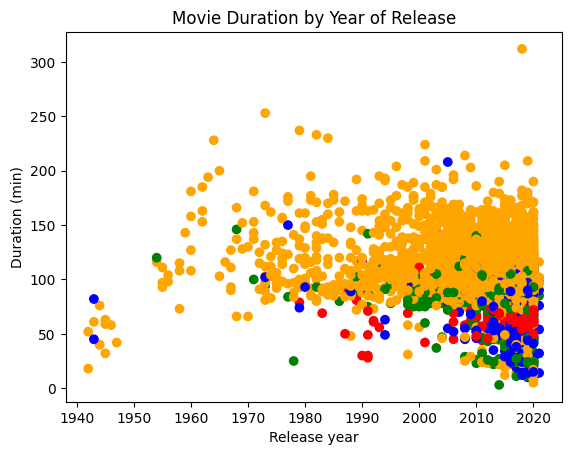

In [11]:
colors = []

for lab, row in netflix_movies.iterrows():
    if row["genre"] == "Children":
        colors.append("green")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("red")
    else:
        colors.append("orange")

plt.scatter(netflix_movies["release_year"], netflix_movies["duration"], c = colors)
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.title("Movie Duration by Year of Release")
plt.show()

In [ ]:
import numpy as np
arr = np.array(netflix_movies["duration"])
print(np.median(arr))
print(np.mean(arr))

## Después de inspeccionar la trama, responda la pregunta "¿Estamos seguros de que las películas son cada vez más cortas?" asignando "yes"o "no"a la variable answer.

In [ ]:
answer = "No"